Name : Sonam Singh</br>
Email-id : singh.sonam277@gmail.com

In [676]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import xgboost

In [677]:
df=pd.read_csv("garments_worker_productivity.csv")

In [678]:
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


01 date : Date in MM-DD-YYYY<br>
02 day : Day of the Week<br>
03 quarter : A portion of the month. A month was divided into four quarters<br>
04 department : Associated department with the instance<br>
05 team_no : Associated team number with the instance<br>
06 no_of_workers : Number of workers in each team<br>
07 no_of_style_change : Number of changes in the style of a particular product<br>
08 targeted_productivity : Targeted productivity set by the Authority for each team for each day.<br>
09 smv : Standard Minute Value, it is the allocated time for a task<br>
10 wip : Work in progress. Includes the number of unfinished items for products<br>
11 over_time : Represents the amount of overtime by each team in minutes<br>
12 incentive : Represents the amount of financial incentive (in BDT) that enables or motivates a particular course of action.<br>
13 idle_time : The amount of time when the production was interrupted due to several reasons<br>
14 idle_men : The number of workers who were idle due to production interruption<br>
15 actual_productivity : The actual % of productivity that was delivered by the workers. It ranges from 0-1.<br>

In [679]:
df.shape

(1197, 15)

#### replacing the space with name and this now 'Department' has only two categories

In [680]:
print("Department Categories before :",df['department'].unique())
df['department'].replace('finishing ','finishing',inplace=True)
print("Department Categories After :",df['department'].unique())

Department Categories before : ['sweing' 'finishing ' 'finishing']
Department Categories After : ['sweing' 'finishing']


#### Looking for NaN Values

In [583]:
df.isnull().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

   #### Before treating NaN values we need to look for if we have any outliers in the data

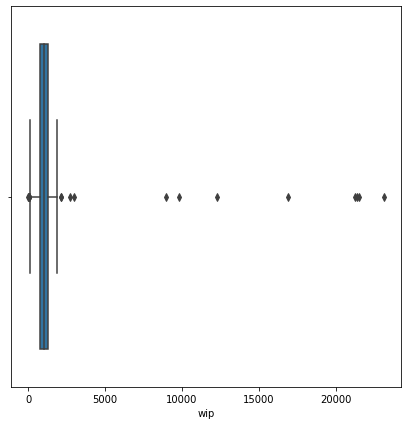

In [584]:
fig, ax =plt.subplots(figsize=(7,7))
sns.boxplot('wip',data=df)

In [585]:
x= df[(df['wip']>200) & (df['wip']<2000)]

In [373]:
df['day'].unique()

array(['Thursday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday'],
      dtype=object)

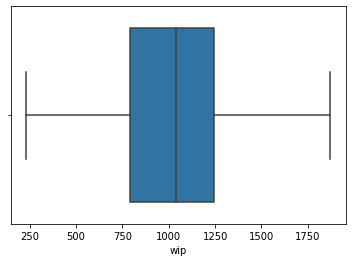

In [374]:
sns.boxplot('wip',data=x)

In [375]:
df['quarter'].unique()

array(['Quarter1', 'Quarter2', 'Quarter3', 'Quarter4', 'Quarter5'],
      dtype=object)

In [376]:
# Removing outlier using InterQuartile Range

Q3 = np.quantile(df['wip'], 0.75)
Q1 = np.quantile(df['wip'], 0.25)
IQR = Q3 - Q1
lower_range = Q1 - 1.5 * IQR
upper_range = Q3 + 1.5 * IQR
outlier_free_list = [x for x in df['wip'] if ((x > lower_range) & (x < upper_range))]
filtered_data = df.loc[df['wip'].isin(outlier_free_list)]


#### Check the relationship between Day and the Quarter

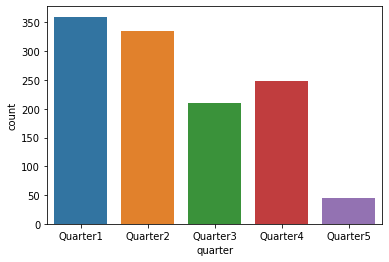

In [377]:
sns.countplot(x='quarter',data=df)

####              The above digram depicts that the quarter 5 has less data points.

In [378]:
gp = df.groupby(by='quarter')['date']

In [379]:
df['date_day']=pd.to_datetime(df['date']).dt.day

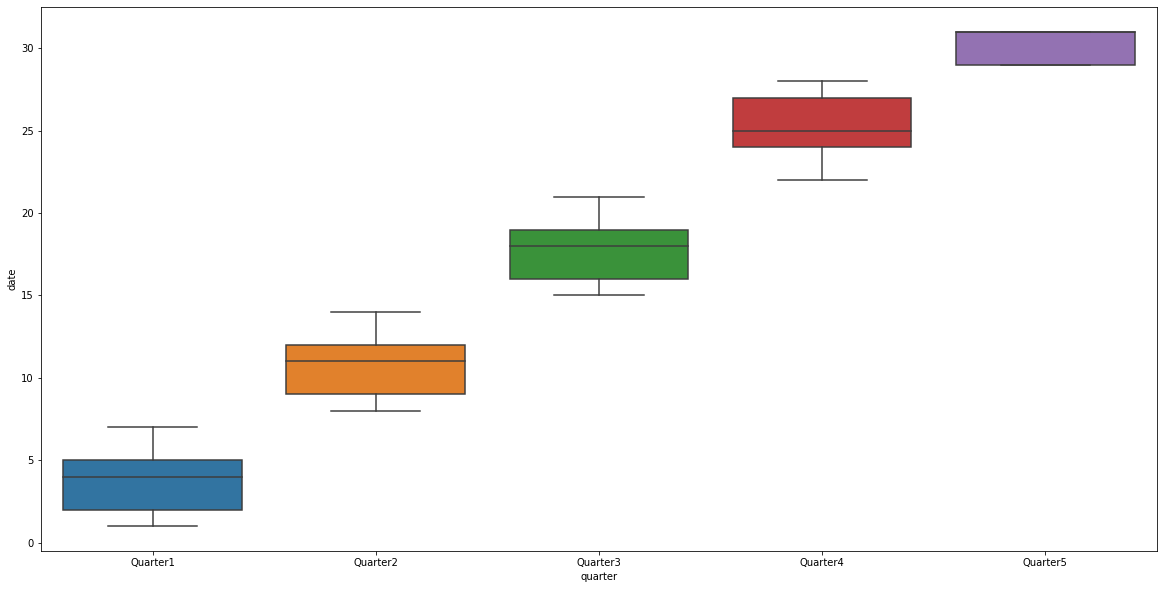

In [380]:
fig, axes =plt.subplots(figsize=(20,10))
sns.boxplot(x='quarter',y=date,data=df)

#### Count data point grouped by day and quarter

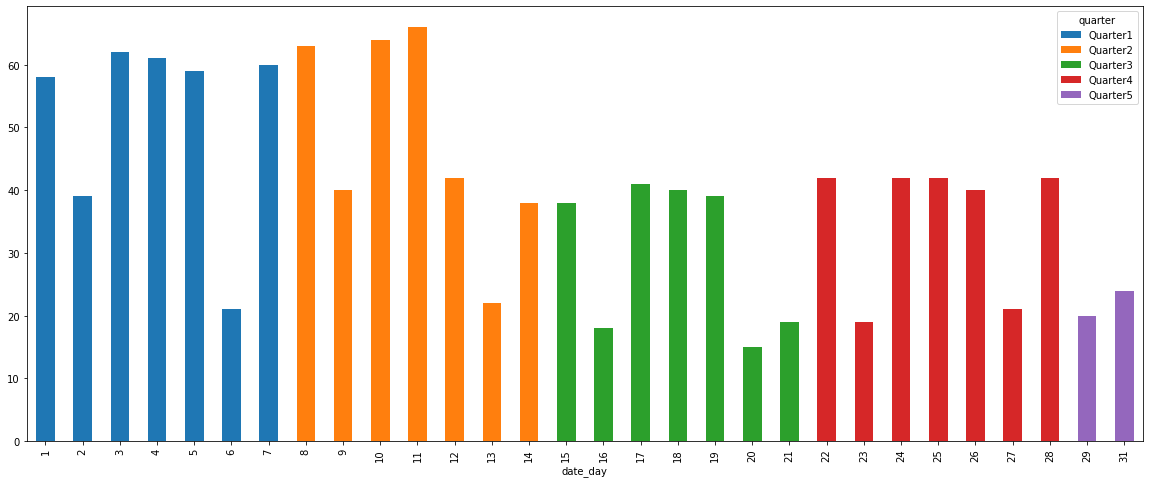

In [381]:
df1=df.groupby(['date_day','quarter'])['quarter'].count().unstack()
df1.plot(kind='bar',stacked=True,legend=True,figsize=(20,8))

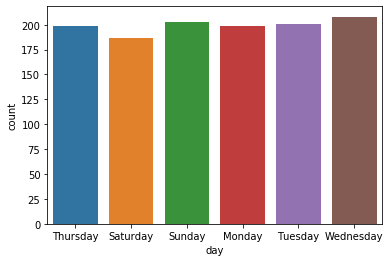

In [382]:
sns.countplot(x='day',data=df)

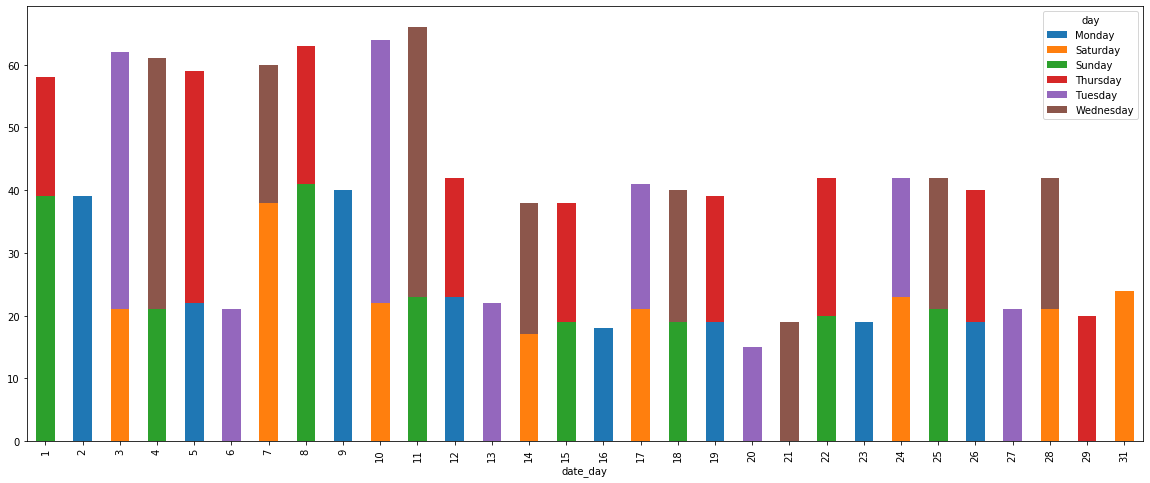

In [383]:
df1=df.groupby(['date_day','day'])['day'].count().unstack()
df1.plot(kind='bar',stacked=True,legend=True,figsize=(20,8))

#### Following things can be observed from the given polt
- Friday is a holiday
- 30th day of the months are missing becuase it is Friday in the month.

In [384]:
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,date_day
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725,1
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500,1
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,1
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,1
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382,1


In [681]:
new_df=df.copy()

In [682]:
new_df['date_day']=pd.to_datetime(new_df['date']).dt.day
new_df['date_month']=pd.to_datetime(new_df['date']).dt.month
new_df.drop(labels="date",inplace=True,axis=1)

In [683]:
new_df.head()

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,date_day,date_month
0,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725,1,1
1,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500,1,1
2,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,1,1
3,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,1,1
4,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382,1,1


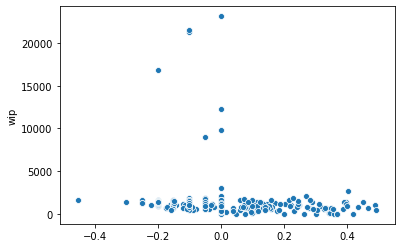

In [684]:
sns.scatterplot(y=df['wip'],x=df['targeted_productivity']-df['actual_productivity'],data=new_df)

#### Since we don't see any relationship between output and work-in-progress----> we can drop this column

In [685]:
cat_column=['quarter', 'day','department', 'team','no_of_style_change']

In [686]:
for columns in cat_column:
    dummy_column=pd.get_dummies(new_df[columns],prefix=columns,prefix_sep='_',drop_first=True)
    new_df=new_df.drop(columns,axis=1)
    new_df=pd.concat([new_df,dummy_column],axis=1)

In [687]:
new_df.head()

,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_workers,actual_productivity,date_day,...,team_5,team_6,team_7,team_8,team_9,team_10,team_11,team_12,no_of_style_change_1,no_of_style_change_2
0,0.80,26.16,1108.0,7080,98,0.0,0,59.0,0.940725,1,...,0,0,0,1,0,0,0,0,0,0
1,0.75,3.94,NaN,960,0,0.0,0,8.0,0.886500,1,...,0,0,0,0,0,0,0,0,0,0
2,0.80,11.41,968.0,3660,50,0.0,0,30.5,0.800570,1,...,0,0,0,0,0,0,1,0,0,0
3,0.80,11.41,968.0,3660,50,0.0,0,30.5,0.800570,1,...,0,0,0,0,0,0,0,1,0,0
4,0.80,25.90,1170.0,1920,50,0.0,0,56.0,0.800382,1,...,0,1,0,0,0,0,0,0,0,0


In [688]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

## Base models

In [689]:
base_case_df=new_df.drop(labels="wip",axis=1)

In [708]:
y=base_case_df['actual_productivity']
X=base_case_df.drop(labels="actual_productivity",axis=1)

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25, random_state = 100)

lrmodel=LinearRegression(normalize=True,)
lrmodel.fit(x_train,y_train)
y_pred=lrmodel.predict(x_test)
train_pred=lrmodel.predict(x_train)
print("Training LR r_2 score :",r2_score(y_train,train_pred))
print("Testing LR r_2 score :",r2_score(y_test,y_pred))

rfmodel=RandomForestRegressor(n_estimators=300,max_depth=6)
rfmodel.fit(x_train,y_train)
rf_predict=rfmodel.predict(x_test)
train_pred=rfmodel.predict(x_train)
print("\nTraining RandomForest r_2 score :",r2_score(y_train,train_pred))
print("Testing RandomForest r_2 score :",r2_score(y_test,rf_predict))

xgbmodel=xgboost.XGBRegressor(n_estimators=1000,max_depth=6,reg_alpha=0.6,reg_lambda=0.4,random_state=10)
xgbmodel.fit(x_train,y_train)
xgb_train=rfmodel.predict(x_train)
xgb_pred=xgbmodel.predict(x_test)
print("\nTraining XGBoost r_2 score :",r2_score(y_train,xgb_train))
print("Testing XGBoost r_2 score :",r2_score(y_test,xgb_pred))

Training LR r_2 score : 0.3303111172040255
Testing LR r_2 score : 0.3089321683085855

Training RandomForest r_2 score : 0.6502596603512605
Testing RandomForest r_2 score : 0.4849224929568763

Training XGBoost r_2 score : 0.6502596603512605
Testing XGBoost r_2 score : 0.5595070930333852


In [691]:
for i in np.arange(base_case_df.shape[1]-1):
    print(X.columns[i],xgbmodel.feature_importances_[i])

targeted_productivity 0.16121939
smv 0.077632464
over_time 0.029371511
incentive 0.09793204
idle_time 0.0997399
idle_men 0.0
no_of_workers 0.09088726
date_day 0.026196772
date_month 0.01597829
quarter_Quarter2 0.013311128
quarter_Quarter3 0.049290814
quarter_Quarter4 0.05169415
quarter_Quarter5 0.0
day_Saturday 0.010462489
day_Sunday 0.014711516
day_Thursday 0.0105238035
day_Tuesday 0.018592542
day_Wednesday 0.009524049
department_sweing 0.0
team_2 0.0034605833
team_3 0.0067527452
team_4 0.005311968
team_5 0.028839828
team_6 0.012599762
team_7 0.015833315
team_8 0.016941162
team_9 0.013809923
team_10 0.025247851
team_11 0.041964155
team_12 0.0030587094
no_of_style_change_1 0.046457622
no_of_style_change_2 0.0026542488


## Imputing wip values

In [709]:
new_df.head()

,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_workers,actual_productivity,date_day,...,team_5,team_6,team_7,team_8,team_9,team_10,team_11,team_12,no_of_style_change_1,no_of_style_change_2
0,0.80,26.16,1108.0,7080,98,0.0,0,59.0,0.940725,1,...,0,0,0,1,0,0,0,0,0,0
1,0.75,3.94,NaN,960,0,0.0,0,8.0,0.886500,1,...,0,0,0,0,0,0,0,0,0,0
2,0.80,11.41,968.0,3660,50,0.0,0,30.5,0.800570,1,...,0,0,0,0,0,0,1,0,0,0
3,0.80,11.41,968.0,3660,50,0.0,0,30.5,0.800570,1,...,0,0,0,0,0,0,0,1,0,0
4,0.80,25.90,1170.0,1920,50,0.0,0,56.0,0.800382,1,...,0,1,0,0,0,0,0,0,0,0


In [710]:
wip_df=new_df.copy()

In [711]:
mask = wip_df.interpolate(axis=1, limit_area='inside', limit=1, limit_direction='backward').isna()
wip_df = wip_df.interpolate(axis=1, limit_area='inside', limit=1).mask(mask)

In [712]:
wip_df.head()

,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_workers,actual_productivity,date_day,...,team_5,team_6,team_7,team_8,team_9,team_10,team_11,team_12,no_of_style_change_1,no_of_style_change_2
0,0.80,26.16,1108.00,7080.0,98.0,0.0,0.0,59.0,0.940725,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.75,3.94,481.97,960.0,0.0,0.0,0.0,8.0,0.886500,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.80,11.41,968.00,3660.0,50.0,0.0,0.0,30.5,0.800570,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.80,11.41,968.00,3660.0,50.0,0.0,0.0,30.5,0.800570,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.80,25.90,1170.00,1920.0,50.0,0.0,0.0,56.0,0.800382,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [713]:
wip_df.isnull().sum()

targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_workers            0
actual_productivity      0
date_day                 0
date_month               0
quarter_Quarter2         0
quarter_Quarter3         0
quarter_Quarter4         0
quarter_Quarter5         0
day_Saturday             0
day_Sunday               0
day_Thursday             0
day_Tuesday              0
day_Wednesday            0
department_sweing        0
team_2                   0
team_3                   0
team_4                   0
team_5                   0
team_6                   0
team_7                   0
team_8                   0
team_9                   0
team_10                  0
team_11                  0
team_12                  0
no_of_style_change_1     0
no_of_style_change_2     0
dtype: int64

### Creating validation dataset after imputing work-in-progress

In [718]:
y=wip_df['actual_productivity']
X=wip_df.drop(labels="actual_productivity",axis=1)

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25, random_state = 100)


lrmodel=LinearRegression(normalize=True,)
lrmodel.fit(x_train,y_train)
y_pred=lrmodel.predict(x_test)
train_pred=lrmodel.predict(x_train)
print("Training LR r_2 score :",r2_score(y_train,train_pred))
print("Testing LR r_2 score :",r2_score(y_test,y_pred))

rfmodel=RandomForestRegressor(n_estimators=300,max_depth=6)
rfmodel.fit(x_train,y_train)
rf_predict=rfmodel.predict(x_test)
train_pred=rfmodel.predict(x_train)
print("\nTraining RandomForest r_2 score :",r2_score(y_train,train_pred))
print("Testing RandomForest r_2 score :",r2_score(y_test,rf_predict))

xgbmodel=xgboost.XGBRegressor(n_estimators=100,max_depth=8,reg_alpha=0.6,reg_lambda=0.4,random_state=10)
xgbmodel.fit(x_train,y_train)
xgb_train=rfmodel.predict(x_train)
xgb_pred=xgbmodel.predict(x_test)
print("\nTraining XGBoost r_2 score :",r2_score(y_train,xgb_train))
print("Testing XGBoost r_2 score :",r2_score(y_test,xgb_pred))

Training LR r_2 score : 0.3316689067228864
Testing LR r_2 score : 0.3109155771207949

Training RandomForest r_2 score : 0.650948000248772
Testing RandomForest r_2 score : 0.47498469363096985

Training XGBoost r_2 score : 0.650948000248772
Testing XGBoost r_2 score : 0.5368546888361629


In [719]:
for i in np.arange(wip_df.shape[1]-1):
    print(X.columns[i],xgbmodel.feature_importances_[i])

targeted_productivity 0.17298166
smv 0.07710106
wip 0.039763674
over_time 0.013879062
incentive 0.09950166
idle_time 0.09170487
idle_men 0.0
no_of_workers 0.05939583
date_day 0.021560963
date_month 0.015878096
quarter_Quarter2 0.020880127
quarter_Quarter3 0.042275462
quarter_Quarter4 0.07706537
quarter_Quarter5 0.0
day_Saturday 0.011890266
day_Sunday 0.012162346
day_Thursday 0.011450333
day_Tuesday 0.014179933
day_Wednesday 0.020874532
department_sweing 0.0
team_2 0.005990626
team_3 0.016383339
team_4 0.0077584386
team_5 0.012276728
team_6 0.011928765
team_7 0.0132105015
team_8 0.014992976
team_9 0.026603717
team_10 0.024564981
team_11 0.038140386
team_12 0.011784459
no_of_style_change_1 0.008139731
no_of_style_change_2 0.0056800214


## standard scaler

In [720]:
from sklearn.preprocessing import StandardScaler

In [721]:
scaled_df=wip_df.copy()

In [722]:
scale=StandardScaler()
scaled_df[['no_of_workers','targeted_productivity','smv','wip','over_time','incentive','idle_time','idle_men']]=scale.fit_transform(scaled_df[['no_of_workers','targeted_productivity','smv','wip','over_time','incentive','idle_time','idle_men']])

In [723]:
scaled_df.head()

,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_workers,actual_productivity,date_day,...,team_5,team_6,team_7,team_8,team_9,team_10,team_11,team_12,no_of_style_change_1,no_of_style_change_2
0,0.719137,1.014552,0.009734,0.750589,0.373414,-0.057473,-0.113005,1.099229,0.940725,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.208151,-1.016778,-0.403770,-1.077682,-0.238643,-0.057473,-0.113005,-1.199268,0.886500,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.719137,-0.333878,-0.082738,-0.271092,0.073631,-0.057473,-0.113005,-0.185225,0.800570,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.719137,-0.333878,-0.082738,-0.271092,0.073631,-0.057473,-0.113005,-0.185225,0.800570,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.719137,0.990783,0.050686,-0.790895,0.073631,-0.057473,-0.113005,0.964023,0.800382,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Train model on scaled features

In [726]:
y=scaled_df['actual_productivity']
X=scaled_df.drop(labels="actual_productivity",axis=1)

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25, random_state = 100)

lrmodel=LinearRegression(normalize=True,)
lrmodel.fit(x_train,y_train)
y_pred=lrmodel.predict(x_test)
train_pred=lrmodel.predict(x_train)
print("Training LR r_2 score :",r2_score(y_train,train_pred))
print("Testing LR r_2 score :",r2_score(y_test,y_pred))

rfmodel=RandomForestRegressor(n_estimators=300,max_depth=6)
rfmodel.fit(x_train,y_train)
rf_predict=rfmodel.predict(x_test)
train_pred=rfmodel.predict(x_train)
print("\nTraining RandomForest r_2 score :",r2_score(y_train,train_pred))
print("Testing RandomForest r_2 score :",r2_score(y_test,rf_predict))

xgbmodel=xgboost.XGBRegressor(n_estimators=200,max_depth=6,reg_alpha=0.8,reg_lambda=0.5,random_state=10)
xgbmodel.fit(x_train,y_train)
xgb_train=rfmodel.predict(x_train)
xgb_pred=xgbmodel.predict(x_test)
print("\nTraining XGBoost r_2 score :",r2_score(y_train,xgb_train))
print("Testing XGBoost r_2 score :",r2_score(y_test,xgb_pred))

Training LR r_2 score : 0.3316689067228865
Testing LR r_2 score : 0.3109155771207942

Training RandomForest r_2 score : 0.6542256828533569
Testing RandomForest r_2 score : 0.48286245156866603

Training XGBoost r_2 score : 0.6542256828533569
Testing XGBoost r_2 score : 0.5371406381960875


## Feature Engineering

01 date : Date in MM-DD-YYYY<br>
02 day : Day of the Week<br>
03 quarter : A portion of the month. A month was divided into four quarters<br>
04 department : Associated department with the instance<br>
05 team_no : Associated team number with the instance<br>
06 no_of_workers : Number of workers in each team<br>
07 no_of_style_change : Number of changes in the style of a particular product<br>
08 targeted_productivity : Targeted productivity set by the Authority for each team for each day.<br>
09 smv : Standard Minute Value, it is the allocated time for a task<br>
10 wip : Work in progress. Includes the number of unfinished items for products<br>
11 over_time : Represents the amount of overtime by each team in minutes<br>
12 incentive : Represents the amount of financial incentive (in BDT) that enables or motivates a particular course of action.<br>
13 idle_time : The amount of time when the production was interrupted due to several reasons<br>
14 idle_men : The number of workers who were idle due to production interruption<br>
15 actual_productivity : The actual % of productivity that was delivered by the workers. It ranges from 0-1.<br>

In [727]:
new_df.head()

,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_workers,actual_productivity,date_day,...,team_5,team_6,team_7,team_8,team_9,team_10,team_11,team_12,no_of_style_change_1,no_of_style_change_2
0,0.80,26.16,1108.0,7080,98,0.0,0,59.0,0.940725,1,...,0,0,0,1,0,0,0,0,0,0
1,0.75,3.94,NaN,960,0,0.0,0,8.0,0.886500,1,...,0,0,0,0,0,0,0,0,0,0
2,0.80,11.41,968.0,3660,50,0.0,0,30.5,0.800570,1,...,0,0,0,0,0,0,1,0,0,0
3,0.80,11.41,968.0,3660,50,0.0,0,30.5,0.800570,1,...,0,0,0,0,0,0,0,1,0,0
4,0.80,25.90,1170.0,1920,50,0.0,0,56.0,0.800382,1,...,0,1,0,0,0,0,0,0,0,0


In [728]:
scaled_df['idle_men_time']=scaled_df['idle_men']*scaled_df['idle_time']

In [729]:
new_feature=scaled_df.drop(labels=['idle_men','idle_time'],axis=1)

In [730]:
new_feature.head()

,targeted_productivity,smv,wip,over_time,incentive,no_of_workers,actual_productivity,date_day,date_month,quarter_Quarter2,...,team_6,team_7,team_8,team_9,team_10,team_11,team_12,no_of_style_change_1,no_of_style_change_2,idle_men_time
0,0.719137,1.014552,0.009734,0.750589,0.373414,1.099229,0.940725,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.006495
1,0.208151,-1.016778,-0.403770,-1.077682,-0.238643,-1.199268,0.886500,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.006495
2,0.719137,-0.333878,-0.082738,-0.271092,0.073631,-0.185225,0.800570,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.006495
3,0.719137,-0.333878,-0.082738,-0.271092,0.073631,-0.185225,0.800570,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.006495
4,0.719137,0.990783,0.050686,-0.790895,0.073631,0.964023,0.800382,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.006495


In [731]:
y=new_feature['actual_productivity']
X=new_feature.drop(labels="actual_productivity",axis=1)

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25, random_state = 100)

lrmodel=LinearRegression()
lrmodel.fit(x_train,y_train)
y_pred=lrmodel.predict(x_test)
train_pred=lrmodel.predict(x_train)
print("Training LR r_2 score :",r2_score(y_train,train_pred))
print("Testing LR r_2 score :",r2_score(y_test,y_pred))

rfmodel=RandomForestRegressor(n_estimators=300,max_depth=6)
rfmodel.fit(x_train,y_train)
rf_predict=rfmodel.predict(x_test)
train_pred=rfmodel.predict(x_train)
print("\nTraining RandomForest r_2 score :",r2_score(y_train,train_pred))
print("Testing RandomForest r_2 score :",r2_score(y_test,rf_predict))

xgbmodel=xgboost.XGBRegressor(n_estimators=200,max_depth=6,reg_alpha=0.8,reg_lambda=0.2,random_state=10)
xgbmodel.fit(x_train,y_train)
xgb_train=rfmodel.predict(x_train)
xgb_pred=xgbmodel.predict(x_test)
print("\nTraining XGBoost r_2 score :",r2_score(y_train,xgb_train))
print("Testing XGBoost r_2 score :",r2_score(y_test,xgb_pred))

Training LR r_2 score : 0.3214849244832494
Testing LR r_2 score : 0.28105220130421704

Training RandomForest r_2 score : 0.6480776845524316
Testing RandomForest r_2 score : 0.47765697779106775

Training XGBoost r_2 score : 0.6480776845524316
Testing XGBoost r_2 score : 0.5387838694935432


In [732]:
for i in np.arange(new_feature.shape[1]-1):
    print(X.columns[i],xgbmodel.feature_importances_[i])

targeted_productivity 0.19596772
smv 0.07178109
wip 0.040936742
over_time 0.017200524
incentive 0.084240265
no_of_workers 0.04287126
date_day 0.02215838
date_month 0.012026096
quarter_Quarter2 0.014597894
quarter_Quarter3 0.023945663
quarter_Quarter4 0.06748635
quarter_Quarter5 0.0
day_Saturday 0.025050929
day_Sunday 0.005986205
day_Thursday 0.01100509
day_Tuesday 0.006247118
day_Wednesday 0.017375048
department_sweing 0.0
team_2 0.00579444
team_3 0.00879564
team_4 0.012324181
team_5 0.011467841
team_6 0.010001225
team_7 0.015252897
team_8 0.0107942745
team_9 0.023343215
team_10 0.046026047
team_11 0.034123223
team_12 0.007941011
no_of_style_change_1 0.009504639
no_of_style_change_2 0.005309883
idle_men_time 0.14044511
